### 安装配置环境

In [1]:
!pip install numpy pandas matplotlib seaborn plotly requests tqdm opencv-python pillow wandb -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     |████████████████████████████████| 293 kB 53.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 66.9 MB/s eta 0:00:01
     |████████████████████████████████| 280 kB 59.7 MB/s eta 0:00:01
     |████████████████████████████████| 178 kB 66.0 MB/s eta 0:00:01
     |████████████████████████████████| 184 kB 66.1 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 28.5 MB/s eta 0:00:01
     |████████████████████████████████| 177 kB 63.3 MB/s eta 0:00:01
     |████████████████████████████████| 174 kB 67.6 MB/s eta 0:00:01
     |████████████████████████████████| 173 kB 71.3 MB/s eta 0:00:01
     |████████████████████████████████| 168 kB 72.8 MB/s eta 0:00:01
     |████████████████████████████████| 168 kB 33.4 MB/s eta 0:00:01
     |████████████████████████████████| 166 kB 36.2 MB/s eta 0:00:0101
     |████████████████████████████████| 166 kB 32.3 MB/s eta 0:00:01
     |████████████████████████████████| 1

#### 下载安装Pytorch

In [2]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple, https://download.pytorch.org/whl/cu113


#### 下载中文字体文件

In [99]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf --no-check-certificate

--2023-01-24 00:23:50--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “SimHei.ttf”

SimHei.ttf          100%[===================>]   9.58M  21.5MB/s    用时 0.4s    

2023-01-24 00:23:51 (21.5 MB/s) - 已保存 “SimHei.ttf” [10050868/10050868])



#### 创建目录

In [5]:
import os

In [7]:
# 存放结果文件
os.mkdir('output')

# 存放训练得到的模型权重
os.mkdir('checkpoints')

# 存放生成的图表
os.mkdir('图表')

#### 设置matplotlib中文字体

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果报错 Unable to establish SSL connection.，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf --no-check-certificate
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("font",family='SimHei') # 中文字体
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

--2023-01-24 00:28:29--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 10050868 (9.6M) [application/x-font-ttf]
正在保存至: “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf”

/environment/minico 100%[===================>]   9.58M  21.2MB/s    用时 0.5s    

2023-01-24 00:28:30 (21.2 MB/s) - 已保存 “/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf” [10050868/10050868])



### 准备图像分类数据集

#### 下载样例数据集

In [10]:
# 下载数据集压缩包
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip

--2023-01-23 23:32:56--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/fruit30/fruit30_split.zip
正在连接 172.16.0.13:5848... 已连接。
已发出 Proxy 请求，正在等待回应... 200 OK
长度： 226278151 (216M) [application/zip]
正在保存至: “fruit30_split.zip”

fruit30_split.zip   100%[===================>] 215.79M  41.0MB/s    用时 5.6s    

2023-01-23 23:33:02 (38.4 MB/s) - 已保存 “fruit30_split.zip” [226278151/226278151])



In [11]:
# 解压
!unzip fruit30_split.zip >> /dev/null

In [12]:
# 删除压缩包
!rm fruit30_split.zip

#### 查看数据集目录结构

In [13]:
!sudo snap install tree

tree 1.8.0+pkg-3fd6 已从 林博仁(Buo-ren, Lin) (brlin) 安装      /27ms


In [14]:
!tree fruit30_split -L 2

locales-launch: Data of zh_CN locale not found, generating, please wait...
fruit30_split
├── train
│   ├── 菠萝
│   ├── 草莓
│   ├── 车厘子
│   ├── 桂圆
│   ├── 哈密瓜
│   ├── 胡萝卜
│   ├── 黄瓜
│   ├── 火龙果
│   ├── 苦瓜
│   ├── 梨
│   ├── 荔枝
│   ├── 榴莲
│   ├── 芒果
│   ├── 猕猴桃
│   ├── 柠檬
│   ├── 苹果-红
│   ├── 苹果-青
│   ├── 葡萄-白
│   ├── 葡萄-红
│   ├── 脐橙
│   ├── 砂糖橘
│   ├── 山竹
│   ├── 圣女果
│   ├── 石榴
│   ├── 西瓜
│   ├── 西红柿
│   ├── 香蕉
│   ├── 杨梅
│   ├── 椰子
│   └── 柚子
└── val
    ├── 菠萝
    ├── 草莓
    ├── 车厘子
    ├── 桂圆
    ├── 哈密瓜
    ├── 胡萝卜
    ├── 黄瓜
    ├── 火龙果
    ├── 苦瓜
    ├── 梨
    ├── 荔枝
    ├── 榴莲
    ├── 芒果
    ├── 猕猴桃
    ├── 柠檬
    ├── 苹果-红
    ├── 苹果-青
    ├── 葡萄-白
    ├── 葡萄-红
    ├── 脐橙
    ├── 砂糖橘
    ├── 山竹
    ├── 圣女果
    ├── 石榴
    ├── 西瓜
    ├── 西红柿
    ├── 香蕉
    ├── 杨梅
    ├── 椰子
    └── 柚子

62 directories, 0 files


### 迁移学习微调训练图像分类模型

#### 导入工具包

In [3]:
import time
import os
from tqdm import tqdm

import pandas as pd
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")

#### 获取计算硬件

In [4]:
# 有 GPU 就用 GPU，没有就用 CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('device', device)

device cuda:0


#### 图像预处理

In [5]:
from torchvision import transforms

# 训练集图像预处理：缩放裁剪、图像增强、转 Tensor、归一化
train_transform = transforms.Compose([transforms.RandomResizedCrop(224),
                                      transforms.RandomHorizontalFlip(),
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
                                     ])

# 测试集图像预处理-RCTN：缩放、裁剪、转 Tensor、归一化
test_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.CenterCrop(224),
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

#### 载入图像分类数据集

In [6]:
# 数据集文件夹路径
dataset_dir = 'fruit30_split'

In [7]:
train_path = os.path.join(dataset_dir, 'train')
test_path = os.path.join(dataset_dir, 'val')
print('训练集路径', train_path)
print('测试集路径', test_path)

训练集路径 fruit30_split/train
测试集路径 fruit30_split/val


In [8]:
from torchvision import datasets

# 载入训练集
train_dataset = datasets.ImageFolder(train_path, train_transform)

# 载入测试集
test_dataset = datasets.ImageFolder(test_path, test_transform)

In [9]:
print('训练集图像数量', len(train_dataset))
print('类别个数', len(train_dataset.classes))
print('各类别名称', train_dataset.classes)

训练集图像数量 4375
类别个数 30
各类别名称 ['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


In [10]:
print('测试集图像数量', len(test_dataset))
print('类别个数', len(test_dataset.classes))
print('各类别名称', test_dataset.classes)

测试集图像数量 1078
类别个数 30
各类别名称 ['哈密瓜', '圣女果', '山竹', '杨梅', '柚子', '柠檬', '桂圆', '梨', '椰子', '榴莲', '火龙果', '猕猴桃', '石榴', '砂糖橘', '胡萝卜', '脐橙', '芒果', '苦瓜', '苹果-红', '苹果-青', '草莓', '荔枝', '菠萝', '葡萄-白', '葡萄-红', '西瓜', '西红柿', '车厘子', '香蕉', '黄瓜']


#### 类别和索引号 一一对应

In [11]:
# 各类别名称
class_names = train_dataset.classes
n_class = len(class_names)

In [12]:
class_names

['哈密瓜',
 '圣女果',
 '山竹',
 '杨梅',
 '柚子',
 '柠檬',
 '桂圆',
 '梨',
 '椰子',
 '榴莲',
 '火龙果',
 '猕猴桃',
 '石榴',
 '砂糖橘',
 '胡萝卜',
 '脐橙',
 '芒果',
 '苦瓜',
 '苹果-红',
 '苹果-青',
 '草莓',
 '荔枝',
 '菠萝',
 '葡萄-白',
 '葡萄-红',
 '西瓜',
 '西红柿',
 '车厘子',
 '香蕉',
 '黄瓜']

In [13]:
# 映射关系：类别 到 索引号
train_dataset.class_to_idx

{'哈密瓜': 0,
 '圣女果': 1,
 '山竹': 2,
 '杨梅': 3,
 '柚子': 4,
 '柠檬': 5,
 '桂圆': 6,
 '梨': 7,
 '椰子': 8,
 '榴莲': 9,
 '火龙果': 10,
 '猕猴桃': 11,
 '石榴': 12,
 '砂糖橘': 13,
 '胡萝卜': 14,
 '脐橙': 15,
 '芒果': 16,
 '苦瓜': 17,
 '苹果-红': 18,
 '苹果-青': 19,
 '草莓': 20,
 '荔枝': 21,
 '菠萝': 22,
 '葡萄-白': 23,
 '葡萄-红': 24,
 '西瓜': 25,
 '西红柿': 26,
 '车厘子': 27,
 '香蕉': 28,
 '黄瓜': 29}

In [14]:
# 映射关系：索引号 到 类别
idx_to_labels = {y:x for x,y in train_dataset.class_to_idx.items()}

In [15]:
idx_to_labels

{0: '哈密瓜',
 1: '圣女果',
 2: '山竹',
 3: '杨梅',
 4: '柚子',
 5: '柠檬',
 6: '桂圆',
 7: '梨',
 8: '椰子',
 9: '榴莲',
 10: '火龙果',
 11: '猕猴桃',
 12: '石榴',
 13: '砂糖橘',
 14: '胡萝卜',
 15: '脐橙',
 16: '芒果',
 17: '苦瓜',
 18: '苹果-红',
 19: '苹果-青',
 20: '草莓',
 21: '荔枝',
 22: '菠萝',
 23: '葡萄-白',
 24: '葡萄-红',
 25: '西瓜',
 26: '西红柿',
 27: '车厘子',
 28: '香蕉',
 29: '黄瓜'}

In [16]:
# 保存为本地的 npy 文件
np.save('idx_to_labels.npy', idx_to_labels)
np.save('labels_to_idx.npy', train_dataset.class_to_idx)

#### 定义数据加载器DataLoader

In [17]:
from torch.utils.data import DataLoader

In [18]:
BATCH_SIZE = 32

# 训练集的数据加载器
train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=4
                         )

# 测试集的数据加载器
test_loader = DataLoader(test_dataset,
                         batch_size=BATCH_SIZE,
                         shuffle=False,
                         num_workers=4
                        )

#### 查看一个batch的图像和标注

In [19]:
# DataLoader 是 python生成器，每次调用返回一个 batch 的数据
images, labels = next(iter(train_loader))

In [20]:
images.shape

torch.Size([32, 3, 224, 224])

In [21]:
labels

tensor([26,  0, 14,  4,  8, 27, 28, 27, 18, 19,  6, 11,  7, 21,  2,  2, 14, 24,
        18,  0, 28, 24, 28, 26, 13,  3, 19, 27, 16,  0, 10,  8])

#### 可视化一个batch的图像和标注

In [22]:
# 将数据集中的Tensor张量转为numpy的array数据类型
images = images.numpy()

In [23]:
images[5].shape

(3, 224, 224)

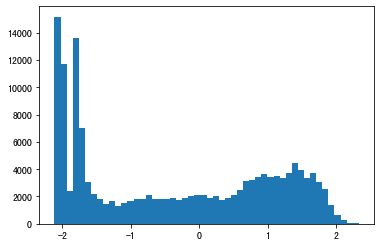

In [24]:
plt.hist(images[5].flatten(), bins=50)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'label:14')

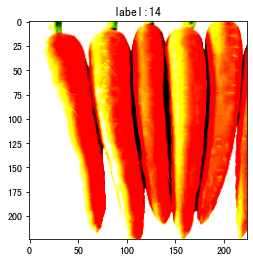

In [25]:
# batch 中经过预处理的图像
idx = 2
plt.imshow(images[idx].transpose((1,2,0))) # 转为(224, 224, 3)
plt.title('label:'+str(labels[idx].item()))

In [26]:
label = labels[idx].item()

In [27]:
label

14

In [28]:
pred_classname = idx_to_labels[label]

In [29]:
pred_classname

'胡萝卜'

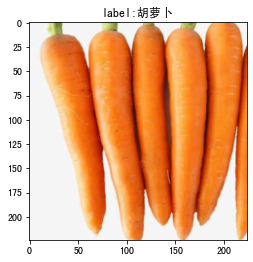

In [30]:
# 原始图像
idx = 2
mean = np.array([0.485, 0.456, 0.406])
std = np.array([0.229, 0.224, 0.225])
plt.imshow(np.clip(images[idx].transpose((1,2,0)) * std + mean, 0, 1))
plt.title('label:'+ pred_classname)
plt.show()

#### 导入训练需使用的工具包

In [47]:
from torchvision import models
import torch.optim as optim

#### 选择迁移学习训练方式

#### 选择一：只微调训练模型最后一层（全连接分类层）

In [48]:
model = models.resnet18(pretrained=True) # 载入预训练模型

# 修改全连接层，使得全连接层的输出与当前数据集类别数对应
# 新建的层默认 requires_grad=True
model.fc = nn.Linear(model.fc.in_features, n_class)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/featurize/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [49]:
model.fc

Linear(in_features=512, out_features=30, bias=True)

In [50]:
# 只微调训练最后一层全连接层的参数，其它层冻结
optimizer = optim.Adam(model.fc.parameters())

#### 训练配置

In [51]:
model = model.to(device)

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss() 

# 训练轮次 Epoch
EPOCHS = 20

#### 运行完整训练

In [60]:
# 遍历每个 EPOCH
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # 获得一个 batch 的数据和标注
        images = images.to(device)
        labels = labels.to(device)

        # 输入模型，执行前向预测
        outputs = model(images)
        loss = criterion(outputs, labels) # 由 logit，计算当前 batch 中，每个样本的平均交叉熵损失函数值
        
        # 反向传播“三部曲”
        optimizer.zero_grad() # 清除梯度
        loss.backward() # 反向传播
        optimizer.step() # 优化更新

100%|██████████| 20/20 [03:05<00:00,  9.29s/it]


#### 在测试集上初步测试

In [61]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum()

    print('测试集上的准确率为 {:.3f} %'.format(100 * correct / total))

100%|██████████| 34/34 [00:02<00:00, 12.20it/s]

测试集上的准确率为 87.013 %


#### 保存模型

In [62]:
torch.save(model, 'checkpoints/fruit30_pytorch_20220814.pth')

#### 选择二：微调训练所有层

In [65]:
model = models.resnet18(pretrained=True) # 载入预训练模型

model.fc = nn.Linear(model.fc.in_features, n_class)

optimizer = optim.Adam(model.parameters())

In [66]:
model = model.to(device)

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss() 

# 训练轮次 Epoch
EPOCHS = 20

In [67]:
# 遍历每个 EPOCH
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # 获得一个 batch 的数据和标注
        images = images.to(device)
        labels = labels.to(device)

        # 输入模型，执行前向预测
        outputs = model(images)
        loss = criterion(outputs, labels) # 由 logit，计算当前 batch 中，每个样本的平均交叉熵损失函数值
        
        # 反向传播“三部曲”
        optimizer.zero_grad() # 清除梯度
        loss.backward() # 反向传播
        optimizer.step() # 优化更新

100%|██████████| 20/20 [03:17<00:00,  9.87s/it]


In [68]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum()

    print('测试集上的准确率为 {:.3f} %'.format(100 * correct / total))

100%|██████████| 34/34 [00:02<00:00, 11.67it/s]

测试集上的准确率为 79.963 %


#### 选择三：随机初始化模型全部权重，从头训练所有层

In [69]:
model = models.resnet18(pretrained=False) # 只载入模型结构，不载入预训练权重参数

model.fc = nn.Linear(model.fc.in_features, n_class)

optimizer = optim.Adam(model.parameters())

In [70]:
model = model.to(device)

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss() 

# 训练轮次 Epoch
EPOCHS = 20

In [71]:
# 遍历每个 EPOCH
for epoch in tqdm(range(EPOCHS)):

    model.train()

    for images, labels in train_loader:  # 获得一个 batch 的数据和标注
        images = images.to(device)
        labels = labels.to(device)

        # 输入模型，执行前向预测
        outputs = model(images)
        loss = criterion(outputs, labels) # 由 logit，计算当前 batch 中，每个样本的平均交叉熵损失函数值
        
        # 反向传播“三部曲”
        optimizer.zero_grad() # 清除梯度
        loss.backward() # 反向传播
        optimizer.step() # 优化更新

100%|██████████| 20/20 [03:16<00:00,  9.80s/it]


In [72]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in tqdm(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (preds == labels).sum()

    print('测试集上的准确率为 {:.3f} %'.format(100 * correct / total))

100%|██████████| 34/34 [00:02<00:00, 11.88it/s]

测试集上的准确率为 53.525 %


### 迁移学习微调训练图像分类模型

In [73]:
from torchvision import models
import torch.optim as optim
from torch.optim import lr_scheduler

#### 训练配置

In [74]:
model = model.to(device)

# 交叉熵损失函数
criterion = nn.CrossEntropyLoss() 

# 训练轮次 Epoch
EPOCHS = 30

# 学习率降低策略
lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

### 函数：在训练集上训练

In [75]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [76]:
def train_one_batch(images, labels):
    '''
    运行一个 batch 的训练，返回当前 batch 的训练日志
    '''
    
    # 获得一个 batch 的数据和标注
    images = images.to(device)
    labels = labels.to(device)
    
    outputs = model(images) # 输入模型，执行前向预测
    loss = criterion(outputs, labels) # 计算当前 batch 中，每个样本的平均交叉熵损失函数值
    
    # 优化更新权重
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 获取当前 batch 的标签类别和预测类别
    _, preds = torch.max(outputs, 1) # 获得当前 batch 所有图像的预测类别
    preds = preds.cpu().numpy()
    loss = loss.detach().cpu().numpy()
    outputs = outputs.detach().cpu().numpy()
    labels = labels.detach().cpu().numpy()
    
    log_train = {}
    log_train['epoch'] = epoch
    log_train['batch'] = batch_idx
    # 计算分类评估指标
    log_train['train_loss'] = loss
    log_train['train_accuracy'] = accuracy_score(labels, preds)
    # log_train['train_precision'] = precision_score(labels, preds, average='macro')
    # log_train['train_recall'] = recall_score(labels, preds, average='macro')
    # log_train['train_f1-score'] = f1_score(labels, preds, average='macro')
    
    return log_train

#### 函数：在整个测试集上评估

In [77]:
def evaluate_testset():
    '''
    在整个测试集上评估，返回分类评估指标日志
    '''

    loss_list = []
    labels_list = []
    preds_list = []
    
    with torch.no_grad():
        for images, labels in test_loader: # 生成一个 batch 的数据和标注
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images) # 输入模型，执行前向预测

            # 获取整个测试集的标签类别和预测类别
            _, preds = torch.max(outputs, 1) # 获得当前 batch 所有图像的预测类别
            preds = preds.cpu().numpy()
            loss = criterion(outputs, labels) # 由 logit，计算当前 batch 中，每个样本的平均交叉熵损失函数值
            loss = loss.detach().cpu().numpy()
            outputs = outputs.detach().cpu().numpy()
            labels = labels.detach().cpu().numpy()

            loss_list.append(loss)
            labels_list.extend(labels)
            preds_list.extend(preds)
        
    log_test = {}
    log_test['epoch'] = epoch
    
    # 计算分类评估指标
    log_test['test_loss'] = np.mean(loss)
    log_test['test_accuracy'] = accuracy_score(labels_list, preds_list)
    log_test['test_precision'] = precision_score(labels_list, preds_list, average='macro')
    log_test['test_recall'] = recall_score(labels_list, preds_list, average='macro')
    log_test['test_f1-score'] = f1_score(labels_list, preds_list, average='macro')
    
    return log_test

#### 训练开始之前，记录日志

In [78]:
epoch = 0
batch_idx = 0
best_test_accuracy = 0

In [81]:
# 训练日志-训练集
df_train_log = pd.DataFrame()
log_train = {}
log_train['epoch'] = 0
log_train['batch'] = 0
images, labels = next(iter(train_loader))
log_train.update(train_one_batch(images, labels))
df_train_log = df_train_log.append(log_train, ignore_index=True)

In [82]:
df_train_log

,epoch,batch,train_loss,train_accuracy
0,0.0,0.0,1.6126513,0.53125


In [83]:
# 训练日志-测试集
df_test_log = pd.DataFrame()
log_test = {}
log_test['epoch'] = 0
log_test.update(evaluate_testset())
df_test_log = df_test_log.append(log_test, ignore_index=True)

In [84]:
df_test_log

,epoch,test_loss,test_accuracy,test_precision,test_recall,test_f1-score
0,0.0,1.391301,0.503711,0.57268,0.50388,0.484875


### 登录wandb

1.安装 wandb：pip install wandb

2.登录 wandb：在命令行中运行wandb login

3.按提示复制粘贴API Key至命令行中

In [85]:
pip install wandb

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


In [86]:
import wandb

wandb.init(project='fruit30', name=time.strftime('%m%d%H%M%S'))

wandb: WARNING Path /home/featurize/work/wandb/ wasn't writable, using system temp directory.
Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: WARNING Path /home/featurize/work/wandb/ wasn't writable, using system temp directory
wandb: WARNING Path /home/featurize/work/wandb/ wasn't writable, using system temp directory
wandb: Currently logged in as: dcrainsailing. Use `wandb login --relogin` to force relogin


#### 运行训练

In [87]:
for epoch in range(1, EPOCHS+1):
    
    print(f'Epoch {epoch}/{EPOCHS}')
    
    ## 训练阶段
    model.train()
    for images, labels in tqdm(train_loader): # 获得一个 batch 的数据和标注
        batch_idx += 1
        log_train = train_one_batch(images, labels)
        df_train_log = df_train_log.append(log_train, ignore_index=True)
        wandb.log(log_train)
        
    lr_scheduler.step()

    ## 测试阶段
    model.eval()
    log_test = evaluate_testset()
    df_test_log = df_test_log.append(log_test, ignore_index=True)
    wandb.log(log_test)
    
    # 保存最新的最佳模型文件
    if log_test['test_accuracy'] > best_test_accuracy: 
        # 删除旧的最佳模型文件(如有)
        old_best_checkpoint_path = 'checkpoints/best-{:.3f}.pth'.format(best_test_accuracy)
        if os.path.exists(old_best_checkpoint_path):
            os.remove(old_best_checkpoint_path)
        # 保存新的最佳模型文件
        new_best_checkpoint_path = 'checkpoints/best-{:.3f}.pth'.format(log_test['test_accuracy'])
        torch.save(model, new_best_checkpoint_path)
        print('保存新的最佳模型', 'checkpoints/best-{:.3f}.pth'.format(best_test_accuracy))
        best_test_accuracy = log_test['test_accuracy']

df_train_log.to_csv('训练日志-训练集.csv', index=False)
df_test_log.to_csv('训练日志-测试集.csv', index=False)

Epoch 1/30


100%|██████████| 137/137 [00:10<00:00, 12.64it/s]


保存新的最佳模型 checkpoints/best-0.000.pth
Epoch 2/30


100%|██████████| 137/137 [00:10<00:00, 12.46it/s]


保存新的最佳模型 checkpoints/best-0.563.pth
Epoch 3/30


100%|██████████| 137/137 [00:10<00:00, 12.51it/s]


保存新的最佳模型 checkpoints/best-0.577.pth
Epoch 4/30


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


保存新的最佳模型 checkpoints/best-0.584.pth
Epoch 5/30


100%|██████████| 137/137 [00:10<00:00, 12.49it/s]


保存新的最佳模型 checkpoints/best-0.605.pth
Epoch 6/30


100%|██████████| 137/137 [00:11<00:00, 12.26it/s]


保存新的最佳模型 checkpoints/best-0.608.pth
Epoch 7/30


100%|██████████| 137/137 [00:10<00:00, 12.47it/s]


Epoch 8/30


100%|██████████| 137/137 [00:10<00:00, 12.69it/s]


Epoch 9/30


100%|██████████| 137/137 [00:11<00:00, 12.30it/s]


Epoch 10/30


100%|██████████| 137/137 [00:11<00:00, 12.45it/s]


Epoch 11/30


100%|██████████| 137/137 [00:11<00:00, 12.38it/s]


保存新的最佳模型 checkpoints/best-0.668.pth
Epoch 12/30


100%|██████████| 137/137 [00:10<00:00, 12.59it/s]


保存新的最佳模型 checkpoints/best-0.680.pth
Epoch 13/30


100%|██████████| 137/137 [00:11<00:00, 12.39it/s]


保存新的最佳模型 checkpoints/best-0.686.pth
Epoch 14/30


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


Epoch 15/30


100%|██████████| 137/137 [00:11<00:00, 12.32it/s]


Epoch 16/30


100%|██████████| 137/137 [00:10<00:00, 12.67it/s]


保存新的最佳模型 checkpoints/best-0.695.pth
Epoch 17/30


100%|██████████| 137/137 [00:11<00:00, 12.40it/s]


Epoch 18/30


100%|██████████| 137/137 [00:10<00:00, 12.54it/s]


保存新的最佳模型 checkpoints/best-0.705.pth
Epoch 19/30


100%|██████████| 137/137 [00:11<00:00, 12.45it/s]


保存新的最佳模型 checkpoints/best-0.710.pth
Epoch 20/30


100%|██████████| 137/137 [00:10<00:00, 12.58it/s]


Epoch 21/30


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


Epoch 22/30


100%|██████████| 137/137 [00:11<00:00, 12.45it/s]


保存新的最佳模型 checkpoints/best-0.715.pth
Epoch 23/30


100%|██████████| 137/137 [00:10<00:00, 12.60it/s]


保存新的最佳模型 checkpoints/best-0.717.pth
Epoch 24/30


100%|██████████| 137/137 [00:10<00:00, 12.56it/s]


Epoch 25/30


100%|██████████| 137/137 [00:10<00:00, 12.57it/s]


Epoch 26/30


100%|██████████| 137/137 [00:11<00:00, 12.35it/s]


保存新的最佳模型 checkpoints/best-0.720.pth
Epoch 27/30


100%|██████████| 137/137 [00:11<00:00, 12.39it/s]


Epoch 28/30


100%|██████████| 137/137 [00:10<00:00, 12.55it/s]


保存新的最佳模型 checkpoints/best-0.722.pth
Epoch 29/30


100%|██████████| 137/137 [00:11<00:00, 12.21it/s]


Epoch 30/30


100%|██████████| 137/137 [00:11<00:00, 12.45it/s]


#### 在测试集上评价

In [88]:
# 载入最佳模型作为当前模型
model = torch.load('checkpoints/best-{:.3f}.pth'.format(best_test_accuracy))

In [89]:
model.eval()
print(evaluate_testset())

{'epoch': 30, 'test_loss': 1.3505898, 'test_accuracy': 0.7300556586270872, 'test_precision': 0.7324855894111261, 'test_recall': 0.7304475036830068, 'test_f1-score': 0.7288910220420163}


### 可视化训练日志

#### 载入训练日志表格

In [31]:
df_train = pd.read_csv('训练日志-训练集.csv')
df_test = pd.read_csv('训练日志-测试集.csv')

In [32]:
df_train

,epoch,batch,train_loss,train_accuracy
0,0.0,0.0,1.612651,0.531250
1,1.0,1.0,1.677492,0.437500
2,1.0,2.0,1.013028,0.718750
3,1.0,3.0,1.198827,0.625000
4,1.0,4.0,1.237722,0.656250
...,...,...,...,...
4106,30.0,4106.0,0.576399,0.843750
4107,30.0,4107.0,0.616456,0.781250
4108,30.0,4108.0,0.763363,0.750000
4109,30.0,4109.0,0.701393,0.812500


In [33]:
df_test

,epoch,test_loss,test_accuracy,test_precision,test_recall,test_f1-score
0,0.0,1.391301,0.503711,0.572680,0.503880,0.484875
1,1.0,1.807743,0.563080,0.586151,0.560782,0.542379
2,2.0,2.003460,0.576994,0.592116,0.577048,0.561856
3,3.0,1.617598,0.584416,0.636623,0.583169,0.567916
4,4.0,1.553020,0.604824,0.637112,0.602252,0.599236
5,5.0,1.563933,0.607607,0.632911,0.607105,0.601604
6,6.0,1.448338,0.667904,0.681259,0.669004,0.663533
7,7.0,1.229467,0.641929,0.671411,0.641512,0.643429
8,8.0,1.831026,0.653989,0.675201,0.654813,0.654005
9,9.0,1.565286,0.653989,0.679993,0.652480,0.649526


#### 训练集损失函数

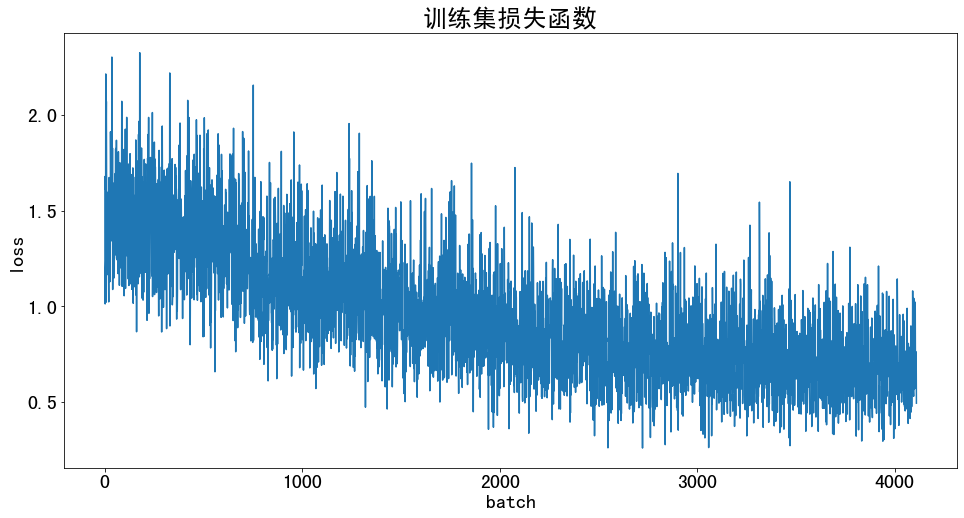

In [34]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_loss']

plt.plot(x, y, label='训练集')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集损失函数', fontsize=25)
plt.savefig('图表/训练集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

#### 训练集准确率

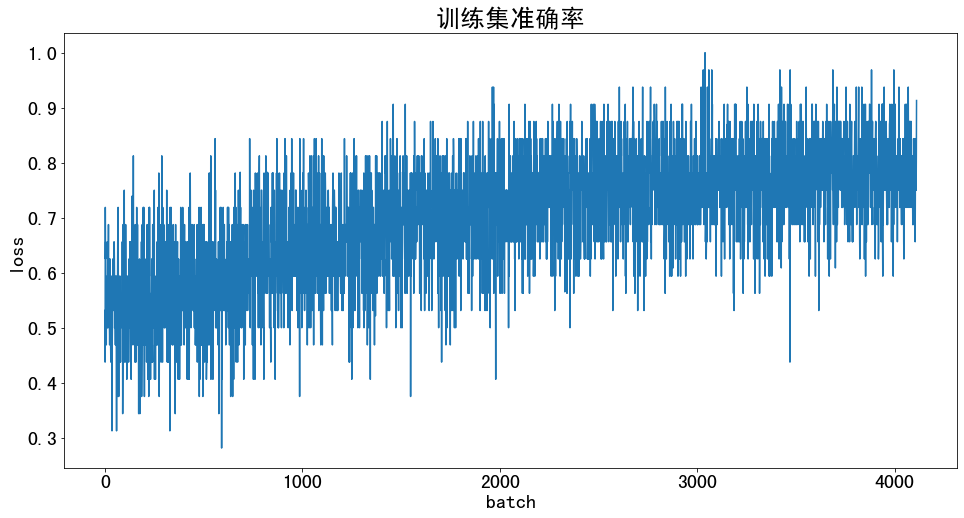

In [35]:
plt.figure(figsize=(16, 8))

x = df_train['batch']
y = df_train['train_accuracy']

plt.plot(x, y, label='训练集')

plt.tick_params(labelsize=20)
plt.xlabel('batch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('训练集准确率', fontsize=25)
plt.savefig('图表/训练集准确率.pdf', dpi=120, bbox_inches='tight')

plt.show()

#### 测试集损失函数

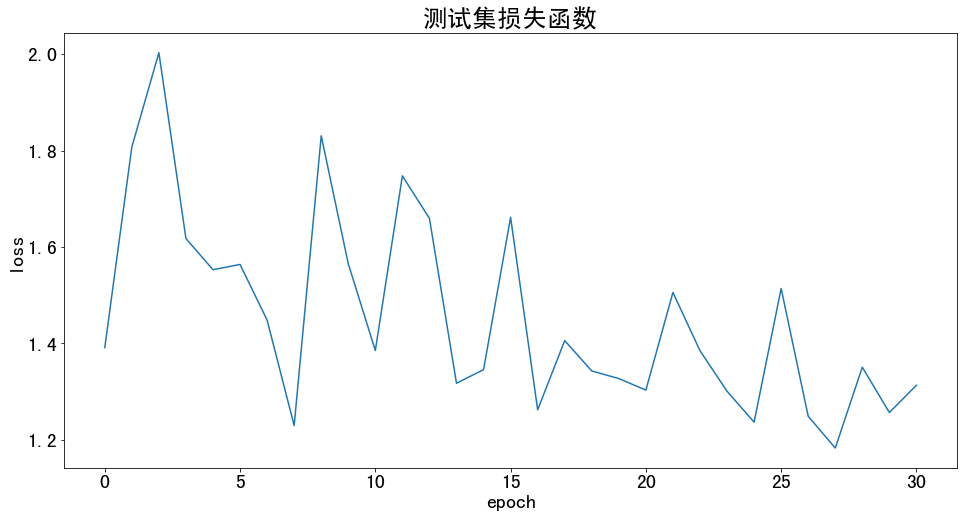

In [36]:
plt.figure(figsize=(16, 8))

x = df_test['epoch']
y = df_test['test_loss']

plt.plot(x, y, label='测试集')

plt.tick_params(labelsize=20)
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('测试集损失函数', fontsize=25)
plt.savefig('图表/测试集损失函数.pdf', dpi=120, bbox_inches='tight')

plt.show()

#### 测试集评估指标

In [37]:
from matplotlib import colors as mcolors
import random
random.seed(124)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'black', 'indianred', 'brown', 'firebrick', 'maroon', 'darkred', 'red', 'sienna', 'chocolate', 'yellow', 'olivedrab', 'yellowgreen', 'darkolivegreen', 'forestgreen', 'limegreen', 'darkgreen', 'green', 'lime', 'seagreen', 'mediumseagreen', 'darkslategray', 'darkslategrey', 'teal', 'darkcyan', 'dodgerblue', 'navy', 'darkblue', 'mediumblue', 'blue', 'slateblue', 'darkslateblue', 'mediumslateblue', 'mediumpurple', 'rebeccapurple', 'blueviolet', 'indigo', 'darkorchid', 'darkviolet', 'mediumorchid', 'purple', 'darkmagenta', 'fuchsia', 'magenta', 'orchid', 'mediumvioletred', 'deeppink', 'hotpink']
markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_",0,1,2,3,4,5,6,7,8,9,10,11]
linestyle = ['--', '-.', '-']
def get_line_arg():
    '''
    随机产生一种绘图线型
    '''
    line_arg = {}
    line_arg['color'] = random.choice(colors)
    # line_arg['marker'] = random.choice(markers)
    line_arg['linestyle'] = random.choice(linestyle)
    line_arg['linewidth'] = random.randint(1, 4)
    # line_arg['markersize'] = random.randint(3, 5)
    return line_arg

In [38]:
metrics = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1-score']

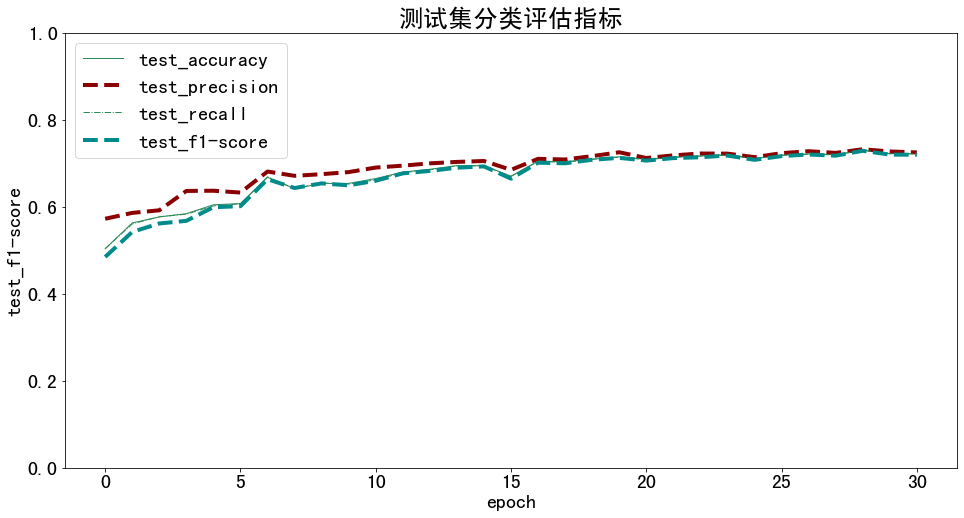

In [39]:
plt.figure(figsize=(16, 8))

x = df_test['epoch']
for y in metrics:
    plt.plot(x, df_test[y], label=y, **get_line_arg())

plt.tick_params(labelsize=20)
plt.ylim([0, 1])
plt.xlabel('epoch', fontsize=20)
plt.ylabel(y, fontsize=20)
plt.title('测试集分类评估指标', fontsize=25)
plt.savefig('图表/测试集分类评估指标.pdf', dpi=120, bbox_inches='tight')

plt.legend(fontsize=20)

plt.show()